array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

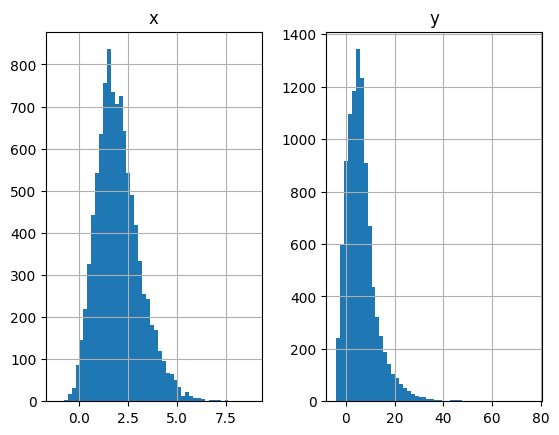

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

N = 10**4
normal = np.random.normal(size=(N,1))
gamma = np.random.gamma(shape=4,size=(N,1))
x = 0.5*normal+0.5*gamma
y = x**2+1+np.random.uniform(-5,5,(N,1))
df = pd.DataFrame(np.concatenate((x,y),axis = 1),columns=('x','y'))
df.hist(bins=50)

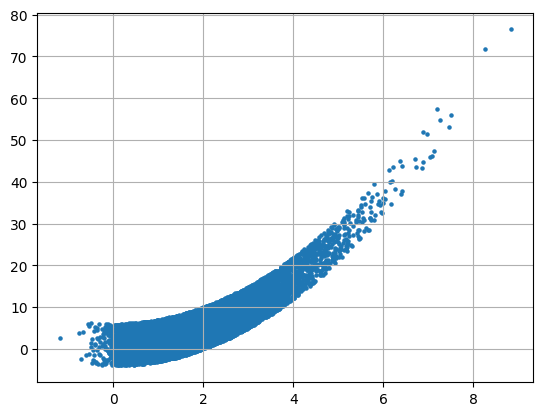

In [2]:
plt.scatter(df['x'],df['y'],s=5)
plt.grid()

In [3]:
#@title Ancho constante
bins=6
M=df['x'].max()
m=df['x'].min()
intervalo=(M-m)/bins
intervalo

1.6703774675240073

In [4]:
m,m+intervalo # límites del primer contenedor

(-1.188737888387352, 0.4816395791366552)

In [5]:
m+intervalo,m+2*intervalo # límites del secondo

(0.4816395791366552, 2.1520170466606627)

In [6]:
# En general...
np.arange(m,M+intervalo,intervalo)

array([-1.18873789,  0.48163958,  2.15201705,  3.82239451,  5.49277198,
        7.16314945,  8.83352692])

In [7]:
limites=np.linspace(m,M,bins+1)
limites

array([-1.18873789,  0.48163958,  2.15201705,  3.82239451,  5.49277198,
        7.16314945,  8.83352692])

In [8]:
df['x_ancho']=pd.cut(df['x'],limites,include_lowest=True)
df.head()

,x,y,x_ancho
0,1.397120,4.321835,"(0.482, 2.152]"
1,4.659873,25.862163,"(3.822, 5.493]"
2,2.304951,9.885958,"(2.152, 3.822]"
3,1.319512,7.099803,"(0.482, 2.152]"
4,1.753923,-0.458683,"(0.482, 2.152]"


In [9]:
x=df.groupby('x_ancho')['x'].mean()
x

x_ancho
(-1.19, 0.482]    0.171134
(0.482, 2.152]    1.406091
(2.152, 3.822]    2.795042
(3.822, 5.493]    4.370978
(5.493, 7.163]    6.037818
(7.163, 8.834]    7.750958
Name: x, dtype: float64

In [10]:
y=df.groupby('x_ancho')['y'].mean()
y

x_ancho
(-1.19, 0.482]     1.192885
(0.482, 2.152]     3.146974
(2.152, 3.822]     8.996049
(3.822, 5.493]    20.386651
(5.493, 7.163]    37.014183
(7.163, 8.834]    61.647821
Name: y, dtype: float64

In [11]:
lin_ancho=LinearRegression()
lin_ancho.fit(x.values.reshape(-1,1),y)

LinearRegression()

In [12]:
lin=LinearRegression()
lin.fit(df[['x']],df['y'])
predict_SD=lin.predict(df[['x']])

C:\Users\isaac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


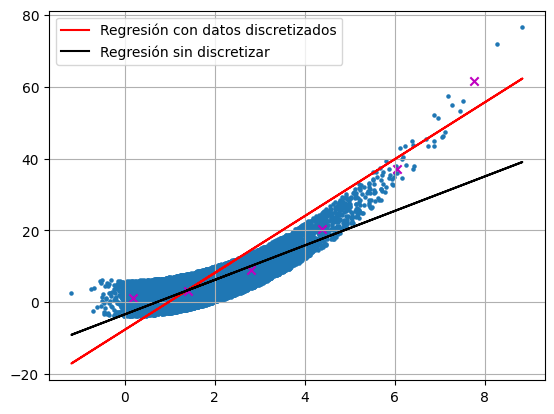

In [13]:
plt.scatter(df['x'],df['y'],s=5)
predict_ancho=lin_ancho.predict(df[['x']])
plt.plot(df['x'],predict_ancho,'r',label='Regresión con datos discretizados')
plt.plot(df['x'],predict_SD,'k',label='Regresión sin discretizar')
plt.scatter(x.values,y.values,marker='x',c='m')
plt.legend()
plt.grid()

In [14]:
df.x_ancho.value_counts()

x_ancho
(0.482, 2.152]    5388
(2.152, 3.822]    3331
(3.822, 5.493]     624
(-1.19, 0.482]     598
(5.493, 7.163]      53
(7.163, 8.834]       6
Name: count, dtype: int64

In [15]:
bins = 6
n_quantile = df['x'].shape[0]/bins
n_quantile

1666.6666666666667

In [16]:
pd.qcut?


In [17]:
df['x_freq'],limites_F=pd.qcut(df['x'],bins,retbins=True)
limites_F

array([-1.18873789,  0.9666604 ,  1.44861138,  1.88616851,  2.35715928,
        3.03361017,  8.83352692])

In [18]:
df['x_freq'].value_counts()

x_freq
(-1.19, 0.967]    1667
(0.967, 1.449]    1667
(1.886, 2.357]    1667
(3.034, 8.834]    1667
(1.449, 1.886]    1666
(2.357, 3.034]    1666
Name: count, dtype: int64

In [19]:
x_F=df.groupby('x_freq')['x'].mean()
x_F

x_freq
(-1.19, 0.967]    0.536741
(0.967, 1.449]    1.221831
(1.449, 1.886]    1.654292
(1.886, 2.357]    2.114633
(2.357, 3.034]    2.670791
(3.034, 8.834]    3.851483
Name: x, dtype: float64

In [20]:
y_F=df.groupby('x_freq')['y'].mean()
y_F

x_freq
(-1.19, 0.967]     1.508144
(0.967, 1.449]     2.503686
(1.449, 1.886]     3.530589
(1.886, 2.357]     5.578410
(2.357, 3.034]     8.131540
(3.034, 8.834]    16.359898
Name: y, dtype: float64

In [21]:
lin_freq=LinearRegression()
lin_freq.fit(x_F.values.reshape(-1,1),y_F)
predict_freq=lin_freq.predict(df[['x']])

C:\Users\isaac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


C:\Users\isaac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


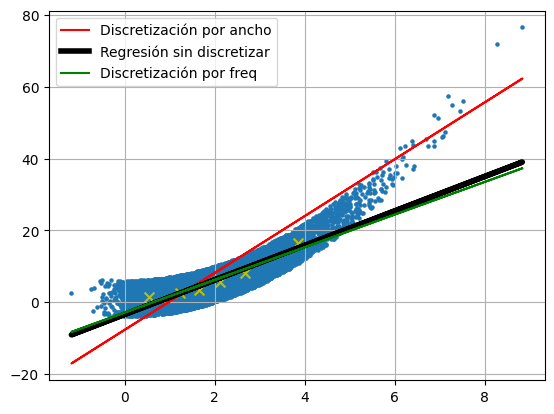

In [22]:
plt.scatter(df['x'],df['y'],s=5)
predict_ancho=lin_ancho.predict(df[['x']])
plt.plot(df['x'],predict_ancho,'r',label='Discretización por ancho')
plt.plot(df['x'],predict_SD,'k',label='Regresión sin discretizar',lw=4)
plt.scatter(x_F.values,y_F.values,marker='x',c='y',s=50)

plt.plot(df['x'],predict_freq,'g',label='Discretización por freq')
plt.legend()
plt.grid()

<Axes: >

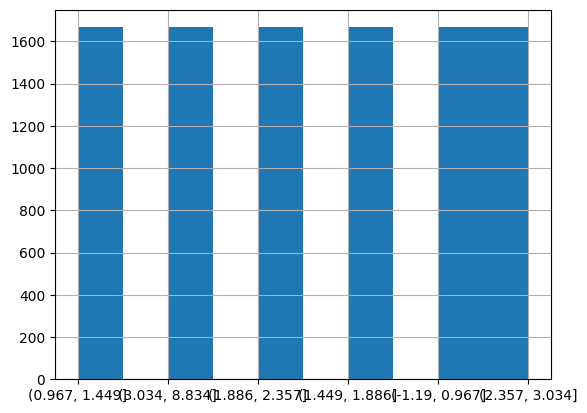

In [23]:
df['x_freq'].astype('string').hist()

<Axes: >

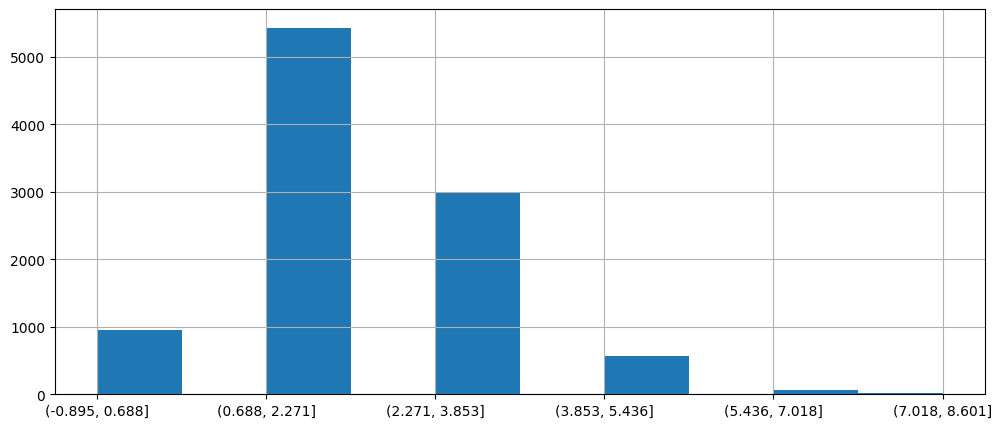

In [54]:
df.x_ancho.astype('string').hist(figsize=(12,5))